DBSCAN Clustering
Finds core samples high decsity and expands cluster from them

In [1]:
#importing modules, packages and dependencies
import numpy as np 
import pandas as pd 
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize']=18,12
%matplotlib inline


In [2]:
#Load data

#Read CSV file
data=pd.read_csv("cleaned_test.csv")

In [3]:
data.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date
0,0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016-06-30
1,1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016-06-30
2,2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016-06-30
3,3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016-06-30
4,4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016-06-30


# we will find outlier and perform clustering based on geographical coordinates (pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude)



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41178 entries, 0 to 41177
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          41178 non-null  int64  
 1   id                  41178 non-null  object 
 2   vendor_id           41178 non-null  int64  
 3   pickup_datetime     41178 non-null  object 
 4   passenger_count     41178 non-null  int64  
 5   pickup_longitude    41178 non-null  float64
 6   pickup_latitude     41178 non-null  float64
 7   dropoff_longitude   41178 non-null  float64
 8   dropoff_latitude    41178 non-null  float64
 9   store_and_fwd_flag  41177 non-null  object 
 10  pickup_date         41177 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.5+ MB


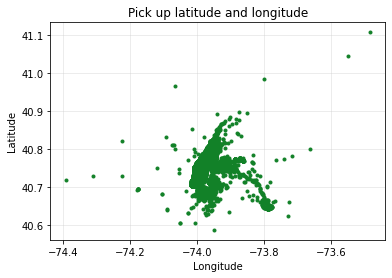

In [5]:
#plot geographical points pickup
_ = plt.plot(data['pickup_longitude'],data['pickup_latitude'],marker='.',linewidth=0,color='#128128')
_ = plt.grid(which='major',color='#cccccc',alpha=0.45)
_ =plt.title("Pick up latitude and longitude")
_ = plt.xlabel("Longitude")
_ =plt.ylabel("Latitude")
_ =plt.show()

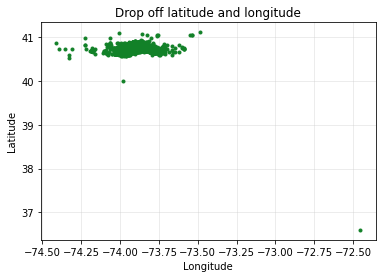

In [7]:
#plot geographical points Dropoff
_ = plt.plot(data['dropoff_longitude'],data['dropoff_latitude'],marker='.',linewidth=0,color='#128128')
_ = plt.grid(which='major',color='#cccccc',alpha=0.45)
_ =plt.title("Drop off latitude and longitude")
_ = plt.xlabel("Longitude")
_ =plt.ylabel("Latitude")
_ =plt.show()

prepare DBSCAN model Data

In [22]:
#prepare data for model
dbscan_data1=data[['pickup_longitude','pickup_latitude']]
#data convert to Numpy array
dbscan_data1=dbscan_data1.values.astype("float32")
dbscan_data1

array([[-73.98813 ,  40.73203 ],
       [-73.9642  ,  40.679993],
       [-73.99744 ,  40.737583],
       ...,
       [-73.97953 ,  40.78161 ],
       [-73.97655 ,  40.75224 ],
       [-74.0041  ,  40.726627]], dtype=float32)

In [23]:
#Normalized DAta
data_scaler=StandardScaler().fit(dbscan_data1)
dbscan_data=data_scaler.transform(dbscan_data1)
dbscan_data
#Normalized numpy array

array([[-0.3744042 , -0.6533985 ],
       [ 0.22868954, -2.4890213 ],
       [-0.60902613, -0.4574695 ],
       ...,
       [-0.15766738,  1.0955635 ],
       [-0.08247298,  0.05953537],
       [-0.77691543, -0.8439448 ]], dtype=float32)

In [24]:
#contruct Model
'''
Min_Sample :: requires minimum 12 data points in a nighborhood
eps :: 0.25 in radius

'''

model=DBSCAN(eps=0.25,min_samples=12,metric='euclidean').fit(dbscan_data)
#model
model

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

**visualize Result**

In [25]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
#separate outliers from cluster data
outliers_df=data[model.labels_==-1] # -1 is stands for outliers
clusters_df=data[model.labels_!=-1] 

colors=model.labels_

colors_clusters=colors[colors != -1]
colors_outliers='black' # outliers show in black color


# get info about clusters
clusters=Counter(model.labels_)
print(clusters)
print(data[model.labels_==-1].head(2))
print("Number of clusters {}".format(len(clusters)-1))


Counter({0: 38889, 1: 1093, 2: 1008, -1: 188})
     Unnamed: 0         id  ...  store_and_fwd_flag pickup_date
421         421  id0985073  ...                   Y  2016-06-30
674         674  id2970680  ...                   N  2016-06-30

[2 rows x 11 columns]
Number of clusters 3


In [27]:
'''
cluster id= 0:  34033 points  
cluster id=-1: 4519 points # this cluster is outliers
cluster id= 1:  673 points 
cluster id=3: 505 points

etc
.
.
.


'''

#total number of clusters are 35

'\ncluster id= 0:  34033 points  \ncluster id=-1: 4519 points # this cluster is outliers\ncluster id= 1:  673 points \ncluster id=3: 505 points\n\netc\n.\n.\n.\n\n\n'

Text(0.5, 1.0, 'Clusters by DBSCAN Algorithm')

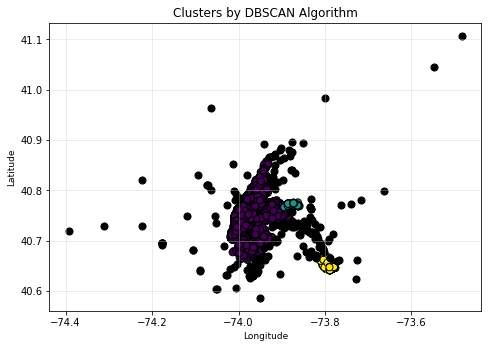

In [29]:
#plot clusters and outliers

fig=plt.figure()
ax=fig.add_axes([.1,.1,2,2])
#for clusters
ax.scatter(clusters_df['pickup_longitude'],clusters_df['pickup_latitude'],
           c=colors_clusters,edgecolors='black',s=50
           )
#for outliers
ax.scatter(outliers_df['pickup_longitude'],outliers_df['pickup_latitude'],
           c=colors_ooutliers,edgecolors='black',s=50
           )
ax.set_xlabel("Longitude",family="Arial",fontsize=9)
ax.set_ylabel("Latitude",family="Arial",fontsize=9)
plt.grid(which='major',color='#cccccc',alpha=0.45)
plt.title("Clusters by DBSCAN Algorithm")



In [30]:
clusters_df.shape

(40990, 11)

In [31]:
data.shape

(41178, 11)

In [32]:
# now for dropoff
#prepare data for model
dbscan_data1=data[['dropoff_longitude','dropoff_latitude']]
#data convert to Numpy array
dbscan_data1=dbscan_data1.values.astype("float32")
dbscan_data1

array([[-73.99017 ,  40.75668 ],
       [-73.95981 ,  40.655403],
       [-73.98616 ,  40.729523],
       ...,
       [-73.9783  ,  40.78586 ],
       [-73.99138 ,  40.75    ],
       [-73.98002 ,  40.      ]], dtype=float32)

In [33]:
#Normalized DAta
data_scaler=StandardScaler().fit(dbscan_data1)
dbscan_data=data_scaler.transform(dbscan_data1)
dbscan_data
#Normalized numpy array

array([[ -0.44431204,   0.13527891],
       [  0.34792304,  -2.4995975 ],
       [ -0.3396096 ,  -0.57125187],
       ...,
       [ -0.13458394,   0.89440995],
       [ -0.47576258,  -0.03850047],
       [ -0.1793711 , -19.551018  ]], dtype=float32)

In [34]:
#contruct Model
'''
Min_Sample :: requires minimum 12 data points in a nighborhood
eps :: 0.25 in radius

'''

model=DBSCAN(eps=0.25,min_samples=12,metric='euclidean').fit(dbscan_data)
#model
model

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

In [35]:
#separate outliers from cluster data
outliers_df=data[model.labels_==-1] # -1 is stands for outliers
clusters_df=data[model.labels_!=-1] 

colors=model.labels_

colors_clusters=colors[colors != -1]
colors_outliers='black' # outliers show in black color


# get info about clusters
clusters=Counter(model.labels_)
print(clusters)
print(data[model.labels_==-1].head(2))
print("Number of clusters {}".format(len(clusters)-1))

Counter({0: 40197, -1: 455, 2: 386, 3: 81, 1: 47, 4: 12})
    Unnamed: 0         id  ...  store_and_fwd_flag pickup_date
8            8  id3905224  ...                   N  2016-06-30
57          57  id3650870  ...                   N  2016-06-30

[2 rows x 11 columns]
Number of clusters 5


Text(0.5, 1.0, 'Clusters by DBSCAN Algorithm')

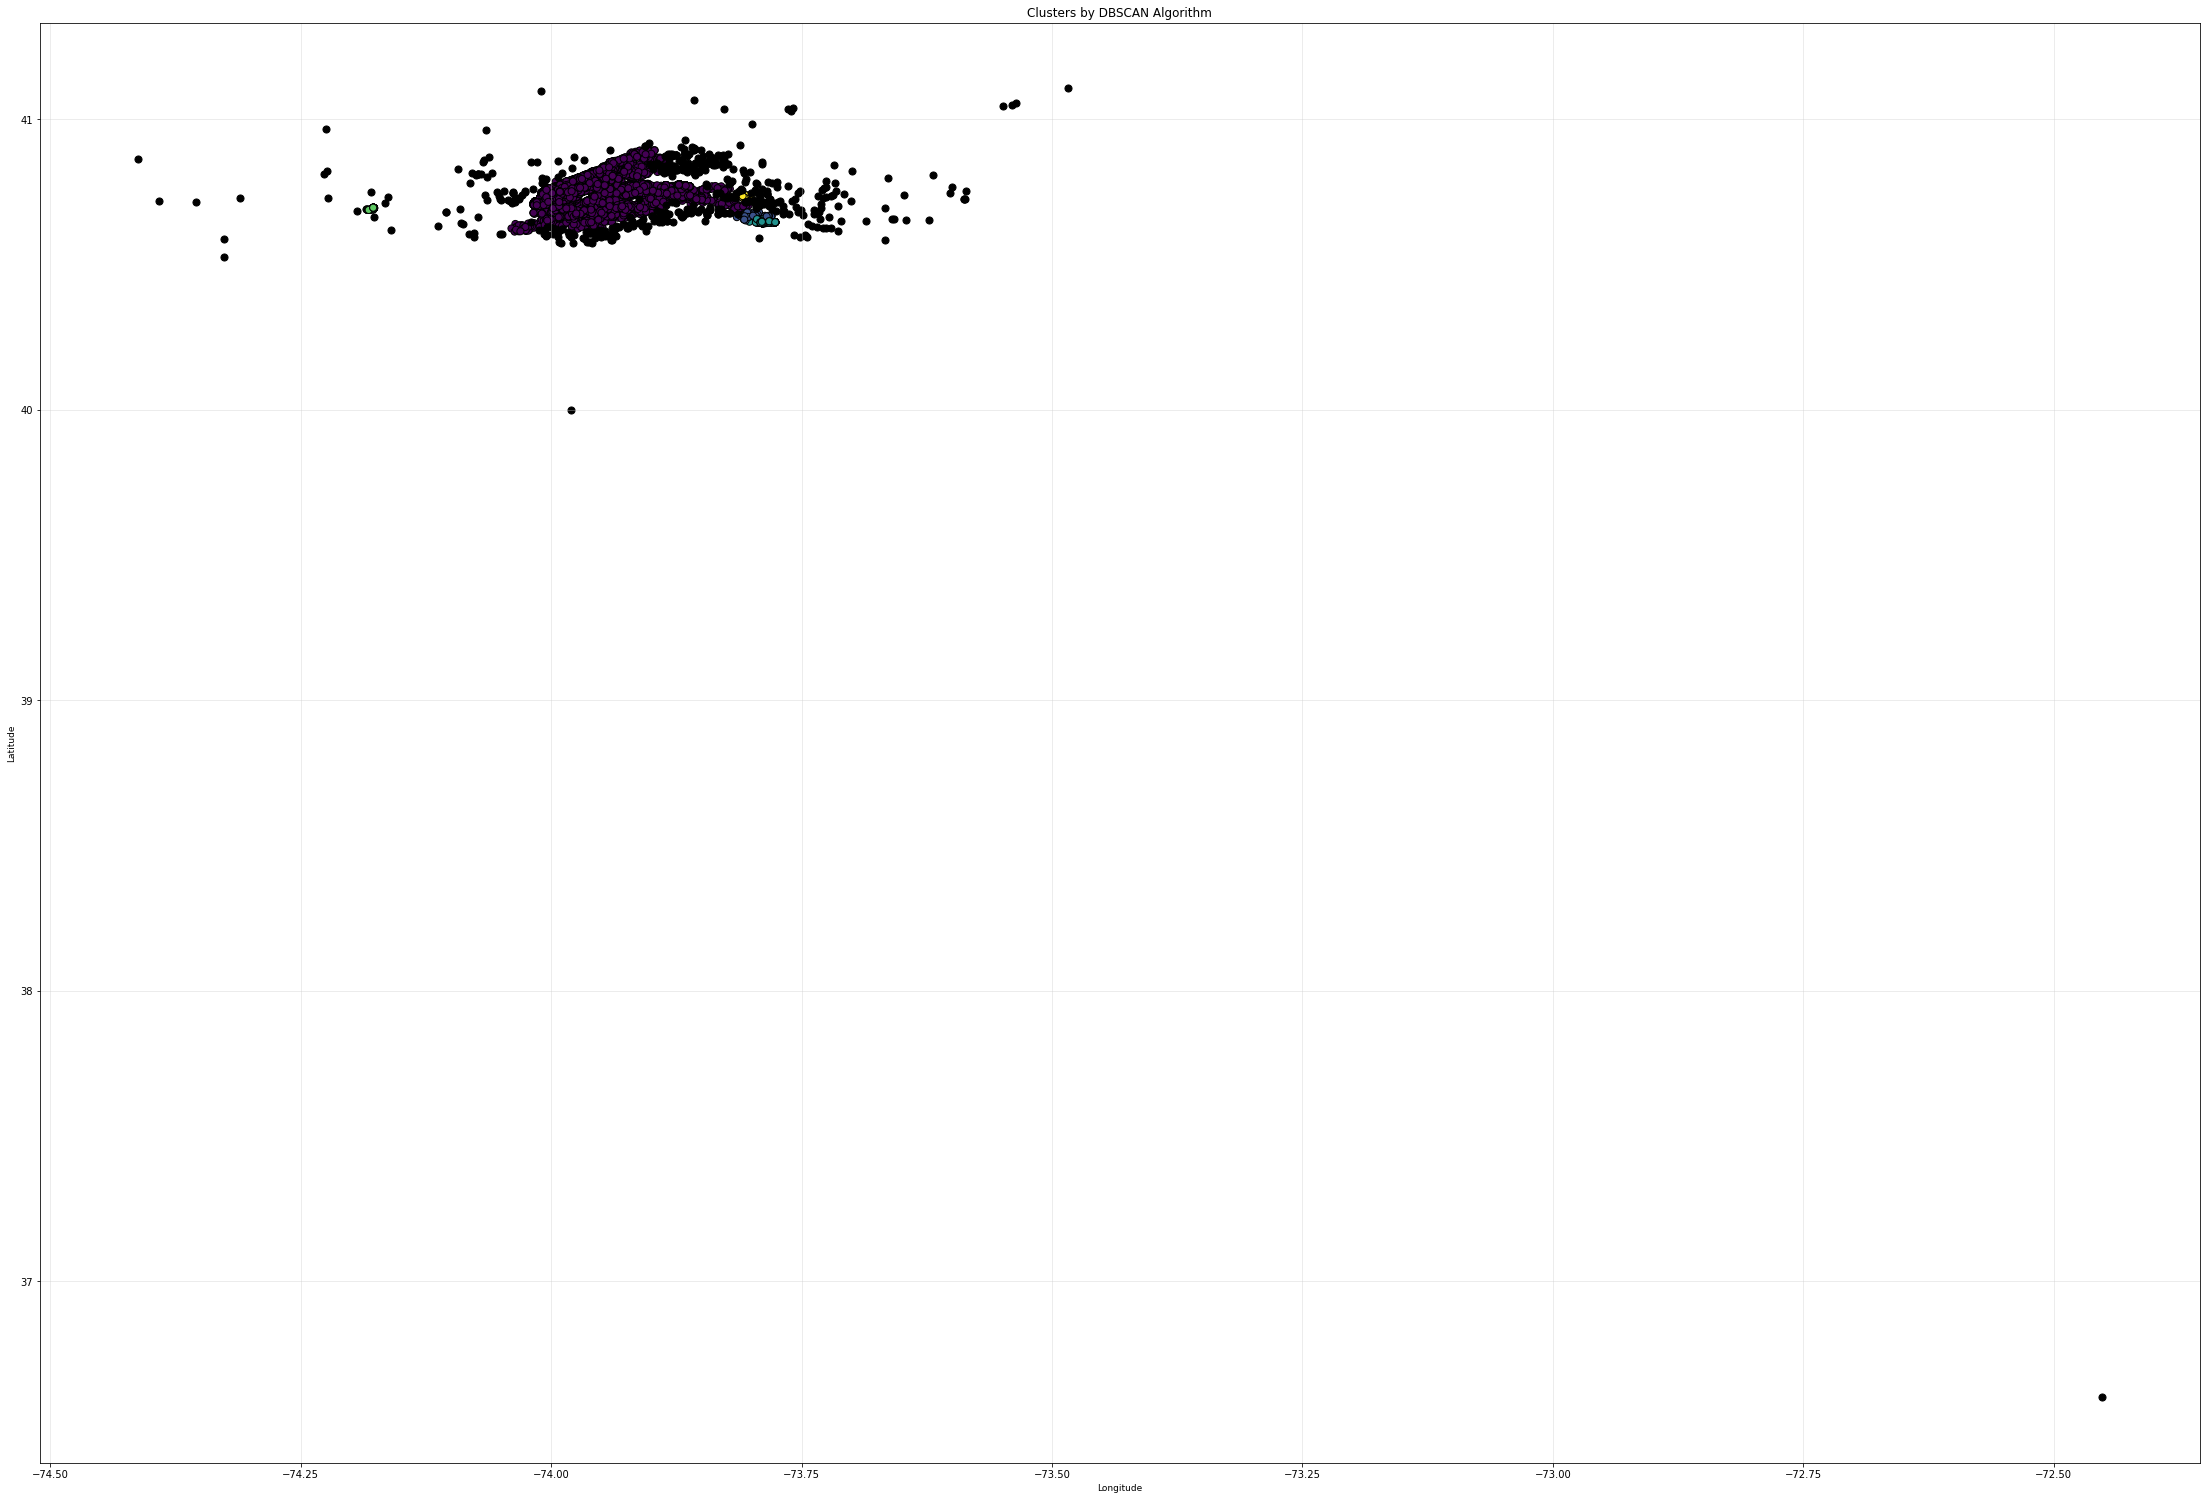

In [39]:
#plot clusters and outliers

fig=plt.figure()
ax=fig.add_axes([.5,.5,5,5])
#for clusters
ax.scatter(clusters_df['dropoff_longitude'],clusters_df['dropoff_latitude'],
           c=colors_clusters,edgecolors='black',s=50
           )
#for outliers
ax.scatter(outliers_df['dropoff_longitude'],outliers_df['dropoff_latitude'],
           c=colors_ooutliers,edgecolors='black',s=50
           )
ax.set_xlabel("Longitude",family="Arial",fontsize=9)
ax.set_ylabel("Latitude",family="Arial",fontsize=9)
plt.grid(which='major',color='#cccccc',alpha=0.45)
plt.title("Clusters by DBSCAN Algorithm")
